In [21]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [22]:
# load the data into a pandas dataframe

data_path = 'C:\\Users\\aadya\\OneDrive\\Desktop\\machine learning\\cleaned_credit_card_categorical.csv'
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       30000 non-null  int64 
 1   id               30000 non-null  int64 
 2   limit_bal        30000 non-null  int64 
 3   gender           30000 non-null  object
 4   education        29935 non-null  object
 5   marriage         29946 non-null  object
 6   age              30000 non-null  int64 
 7   pay_1            30000 non-null  int64 
 8   pay_2            30000 non-null  int64 
 9   pay_3            30000 non-null  int64 
 10  pay_4            30000 non-null  int64 
 11  pay_5            30000 non-null  int64 
 12  pay_6            30000 non-null  int64 
 13  bill_amt1        30000 non-null  int64 
 14  bill_amt2        30000 non-null  int64 
 15  bill_amt3        30000 non-null  int64 
 16  bill_amt4        30000 non-null  int64 
 17  bill_amt5        30000 non-null

In [23]:
df.head()

,Unnamed: 0,id,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,...,pay_amt5,pay_amt6,default,age_group,bill_minus_pay1,bill_minus_pay2,bill_minus_pay3,bill_minus_pay4,bill_minus_pay5,bill_minus_pay6
0,0,1,20000,female,some_grad_school,married,24,2,2,0,...,0,0,1,21-29,partial payment,partial payment,partial payment,paid in full,paid in full,paid in full
1,1,2,120000,female,some_grad_school,single,26,0,2,0,...,0,2000,1,21-29,partial payment,partial payment,partial payment,partial payment,partial payment,partial payment
2,2,3,90000,female,some_grad_school,single,34,0,0,0,...,1000,5000,0,30-39,partial payment,partial payment,partial payment,partial payment,partial payment,partial payment
3,3,4,50000,female,some_grad_school,married,37,0,0,0,...,1069,1000,0,30-39,partial payment,partial payment,partial payment,partial payment,partial payment,partial payment
4,4,5,50000,male,some_grad_school,married,57,0,0,0,...,689,679,0,50-59,partial payment,partial payment,partial payment,partial payment,partial payment,partial payment


In [24]:
# Get all column names
column_names = df.columns

# Display column names
print(column_names)

Index(['Unnamed: 0', 'id', 'limit_bal', 'gender', 'education', 'marriage',
       'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
       'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5',
       'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5',
       'pay_amt6', 'default', 'age_group', 'bill_minus_pay1',
       'bill_minus_pay2', 'bill_minus_pay3', 'bill_minus_pay4',
       'bill_minus_pay5', 'bill_minus_pay6'],
      dtype='object')


In [25]:
# Drop by column index
df1 = df.drop(df.columns[:2], axis=1)


In [26]:
# Get all column names
column_names = df1.columns

# Display column names
print(column_names)

Index(['limit_bal', 'gender', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
       'age_group', 'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3',
       'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6'],
      dtype='object')


In [27]:
# Split the data into training and test sets

X = df1.drop(['default'], axis=1)
X=df1[['limit_bal', 'gender', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'age_group', 'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3',
       'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6']]
#X=df[['AGE', 'JOB','MARITAL','EDUCATION','DEFAULT','HOUSING','LOAN','CONTACT', 'MONTH','DOW','CAMPAIGN','PDAYS','PREVIOUS','POUTCOME','EMPVAR', 'CPI','CCI','EURIBOR3M','NREMP']]
X = pd.get_dummies(X, columns=['gender', 'education', 'marriage', 
       'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3',
       'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6'])
#X = pd.get_dummies(X, columns=['JOB', 'MARITAL', 'EDUCATION','DEFAULT','HOUSING','LOAN','CONTACT','MONTH','DOW','POUTCOME'], drop_first=True)

y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 28465 to 23654
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   limit_bal                        21000 non-null  int64 
 1   age                              21000 non-null  int64 
 2   pay_1                            21000 non-null  int64 
 3   pay_2                            21000 non-null  int64 
 4   pay_3                            21000 non-null  int64 
 5   pay_4                            21000 non-null  int64 
 6   pay_5                            21000 non-null  int64 
 7   pay_6                            21000 non-null  int64 
 8   bill_amt1                        21000 non-null  int64 
 9   bill_amt2                        21000 non-null  int64 
 10  bill_amt3                        21000 non-null  int64 
 11  bill_amt4                        21000 non-null  int64 
 12  bill_amt5                   

In [28]:
# Split the data into training and test sets
X = df1.drop(['default'], axis=1)
X = df1[['limit_bal', 'gender', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
         'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
         'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
         'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
         'age_group', 'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3',
         'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6']]

# One-hot encode categorical columns including 'age_group'
X = pd.get_dummies(X, columns=['gender', 'education', 'marriage', 'age_group',
                               'bill_minus_pay1', 'bill_minus_pay2', 'bill_minus_pay3',
                               'bill_minus_pay4', 'bill_minus_pay5', 'bill_minus_pay6'])

# Define the target variable
y = df1['default']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check data types to confirm all are numerical
X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 28465 to 23654
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   limit_bal                        21000 non-null  int64
 1   age                              21000 non-null  int64
 2   pay_1                            21000 non-null  int64
 3   pay_2                            21000 non-null  int64
 4   pay_3                            21000 non-null  int64
 5   pay_4                            21000 non-null  int64
 6   pay_5                            21000 non-null  int64
 7   pay_6                            21000 non-null  int64
 8   bill_amt1                        21000 non-null  int64
 9   bill_amt2                        21000 non-null  int64
 10  bill_amt3                        21000 non-null  int64
 11  bill_amt4                        21000 non-null  int64
 12  bill_amt5                        21000 non

In [29]:
# Create an instance of a decision tree classifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, ccp_alpha=0)

# Fit the model to the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

In [30]:
#conda install python-graphviz


In [31]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This saves the tree visualization to a file


'decision_tree.pdf'

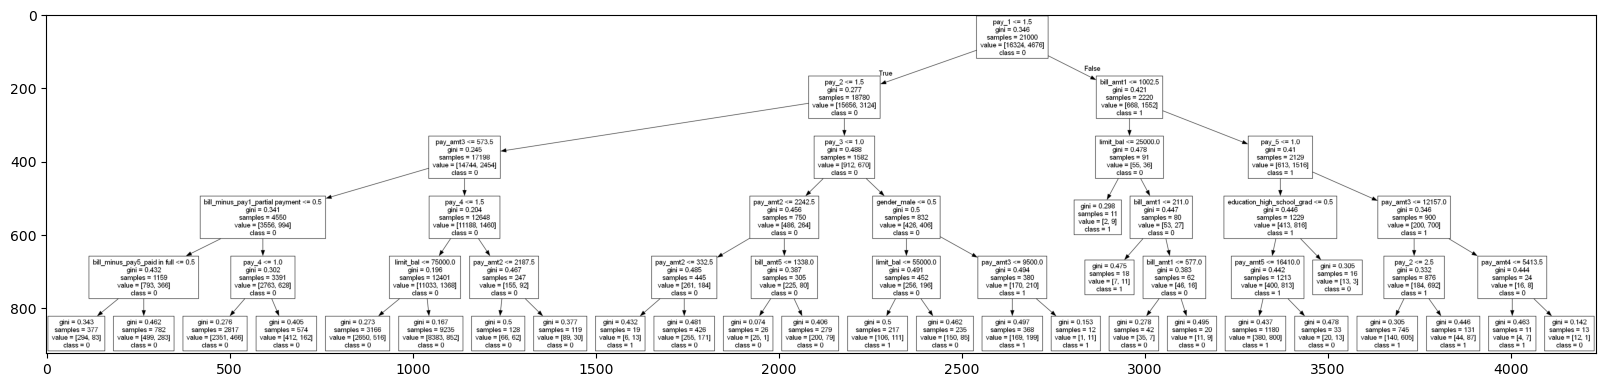

In [33]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)


In [34]:
# Make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [35]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8247
Precision: 0.6833
Recall.  : 0.3963

 -- test set -- 
Accuracy : 0.8167
Precision: 0.6399
Recall.  : 0.3617


In [36]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[15465  2823]
 [  859  1853]]
[[6641 1251]
 [ 399  709]]


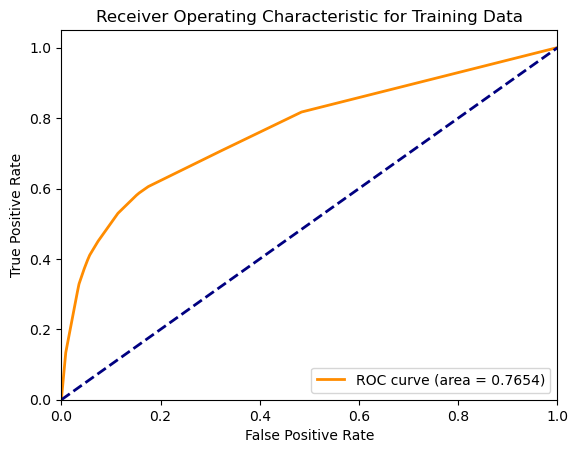

In [37]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y_train is a pandas Series with categorical type
y_train = pd.Series(y_train, dtype="category")

# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:, 1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


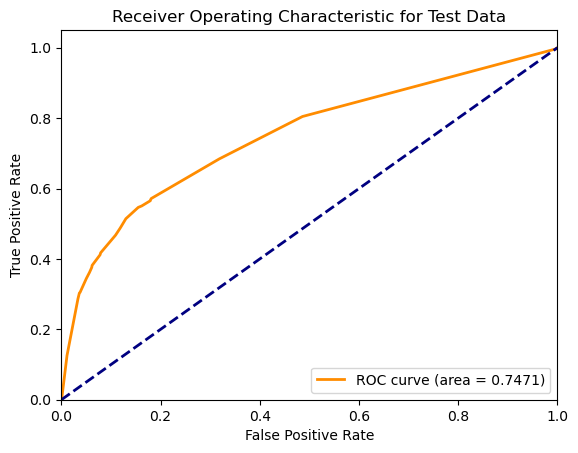

In [38]:
# Ensure y_test is a pandas Series with categorical type
y_test = pd.Series(y_test, dtype="category")

# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:, 1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


    importance                          feature
2     0.679922                            pay_1
3     0.140802                            pay_2
16    0.050718                         pay_amt3
5     0.027933                            pay_4
0     0.019982                        limit_bal
36    0.017775  bill_minus_pay1_partial payment
8     0.013957                        bill_amt1
15    0.010761                         pay_amt2
4     0.008801                            pay_3
6     0.008122                            pay_5
43    0.006166     bill_minus_pay5_paid in full
23    0.004441       education_high_school_grad
21    0.003528                      gender_male
18    0.003125                         pay_amt5
17    0.002250                         pay_amt4
12    0.001718                        bill_amt5
7     0.000000                            pay_6
44    0.000000  bill_minus_pay5_partial payment
45    0.000000     bill_minus_pay6_paid in full
42    0.000000  bill_minus_pay4_partial 

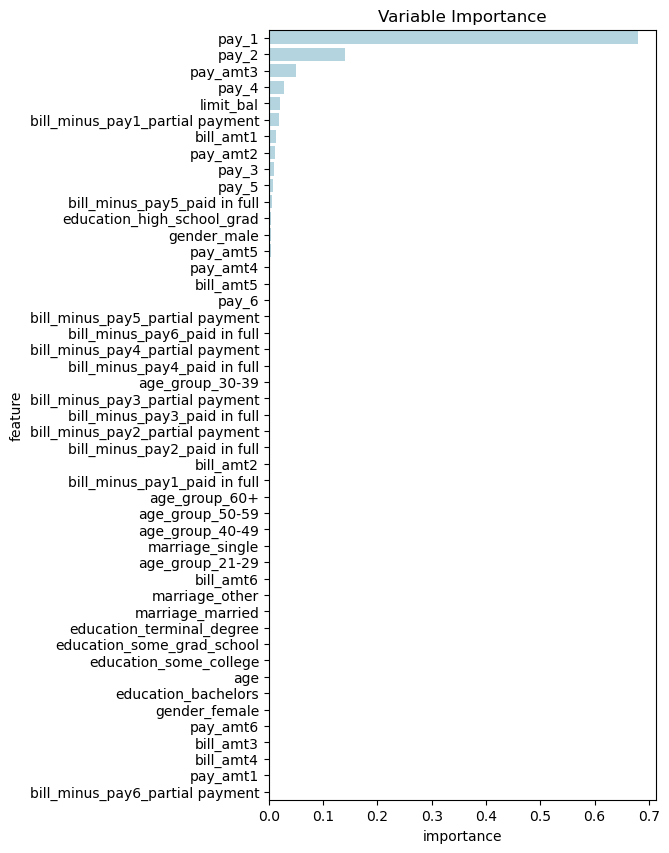

In [39]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

In [40]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 100}
DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=100)


In [41]:
# TUNED MODEL
# Create an instance of a decision tree classifier
dt = DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=100)

# Fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=100)

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # This saves the tree visualization to a file

'decision_tree.pdf'

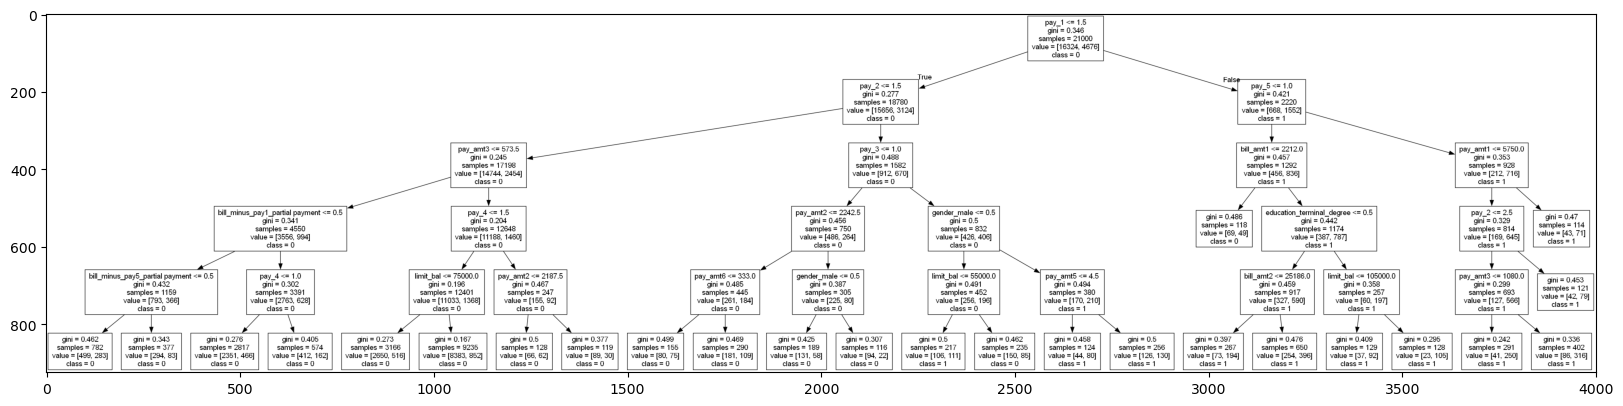

In [43]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)


In [44]:
# Make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)


In [45]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8225
Precision: 0.6758
Recall.  : 0.3901

 -- test set -- 
Accuracy : 0.8183
Precision: 0.6457
Recall.  : 0.3673


In [46]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[15449  2852]
 [  875  1824]]
[[6645 1240]
 [ 395  720]]


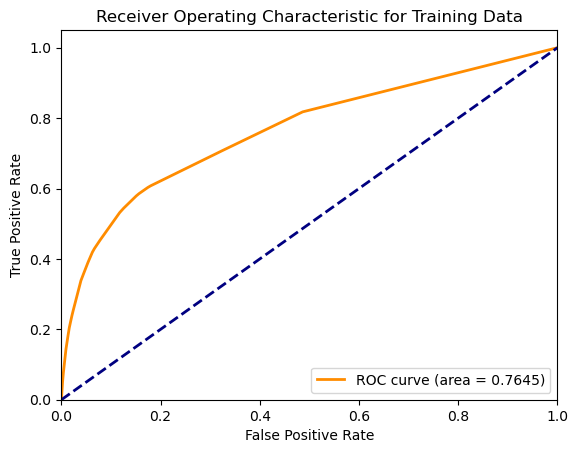

In [47]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure y_train is a pandas Series with categorical type
y_train = pd.Series(y_train, dtype="category")

# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:, 1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()


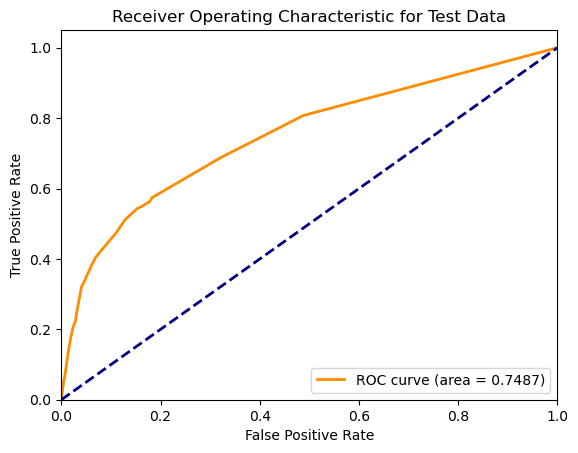

In [48]:
# Ensure y_test is a pandas Series with categorical type
y_test = pd.Series(y_test, dtype="category")

# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:, 1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

    importance                          feature
2     0.686949                            pay_1
3     0.142655                            pay_2
16    0.044400                         pay_amt3
5     0.028222                            pay_4
0     0.018363                        limit_bal
36    0.017959  bill_minus_pay1_partial payment
6     0.010204                            pay_5
15    0.009099                         pay_amt2
4     0.008892                            pay_3
8     0.008507                        bill_amt1
44    0.006230  bill_minus_pay5_partial payment
21    0.004768                      gender_male
26    0.003711        education_terminal_degree
14    0.003506                         pay_amt1
9     0.003178                        bill_amt2
18    0.001921                         pay_amt5
19    0.001437                         pay_amt6
40    0.000000  bill_minus_pay3_partial payment
45    0.000000     bill_minus_pay6_paid in full
31    0.000000                  age_grou

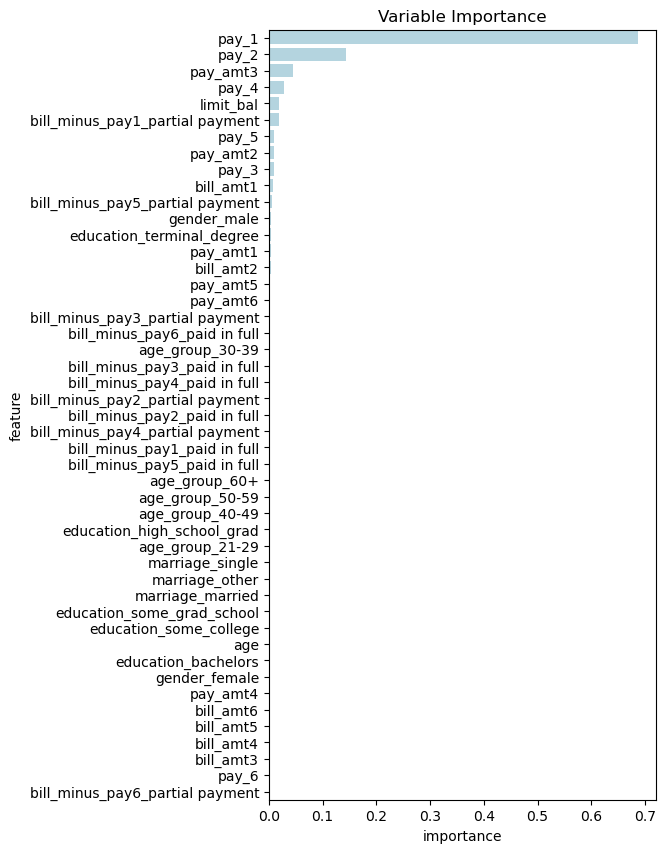

In [49]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()